# NumPy 排序、条件筛选函数

NumPy 提供了多种排序的方法。 这些排序函数实现不同的排序算法，每个排序算法的特征在于执行速度，最坏情况性能，所需的工作空间和算法的稳定性。 下表显示了三种排序算法的比较。
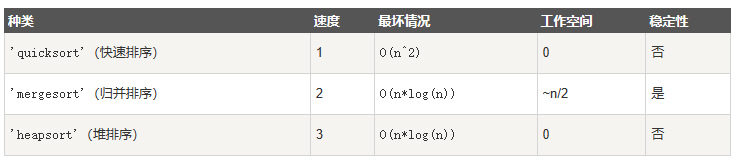
numpy.sort()
numpy.sort() 函数返回输入数组的排序副本。函数格式如下：

numpy.sort(a, axis, kind, order)
参数说明：

a: 要排序的数组
axis: 沿着它排序数组的轴，如果没有数组会被展开，沿着最后的轴排序， axis=0 按列排序，axis=1 按行排序
kind: 默认为'quicksort'（快速排序）
order: 如果数组包含字段，则是要排序的字段

In [1]:
import numpy as np  
 
a = np.array([[3,7],[9,1]])  
print ('我们的数组是：')
print (a)
print ('\n')
print ('调用 sort() 函数：')
print (np.sort(a))
print ('\n')
print ('按列排序：')
print (np.sort(a, axis =  0))
print ('\n')
# 在 sort 函数中排序字段 
dt = np.dtype([('name',  'S10'),('age',  int)]) 
a = np.array([("raju",21),("anil",25),("ravi",  17),  ("amar",27)], dtype = dt)  
print ('我们的数组是：')
print (a)
print ('\n')
print ('按 name 排序：')
print (np.sort(a, order =  'name'))

我们的数组是：
[[3 7]
 [9 1]]


调用 sort() 函数：
[[3 7]
 [1 9]]


按列排序：
[[3 1]
 [9 7]]


我们的数组是：
[(b'raju', 21) (b'anil', 25) (b'ravi', 17) (b'amar', 27)]


按 name 排序：
[(b'amar', 27) (b'anil', 25) (b'raju', 21) (b'ravi', 17)]


numpy.argsort()
numpy.argsort() 函数返回的是数组值从小到大的索引值。

In [3]:
x = np.array([3,  1,  2])  
print ('我们的数组是：')
print (x)
print ('\n')
print ('对 x 调用 argsort() 函数：')
y = np.argsort(x)  
print (y)
print ('\n')
print ('以排序后的顺序重构原数组：')
print (x[y]) # 视图而已
print ('\n')
print ('使用循环重构原数组：')
for i in y:  
    print (x[i], end=" ")

我们的数组是：
[3 1 2]


对 x 调用 argsort() 函数：
[1 2 0]


以排序后的顺序重构原数组：
[1 2 3]


使用循环重构原数组：
1 2 3 

numpy.lexsort()
numpy.lexsort() 用于对多个序列进行排序。把它想象成对电子表格进行排序，每一列代表一个序列，排序时优先照顾靠后的列。

这里举一个应用场景：小升初考试，重点班录取学生按照总成绩录取。在总成绩相同时，数学成绩高的优先录取，在总成绩和数学成绩都相同时，按照英语成绩录取…… 这里，总成绩排在电子表格的最后一列，数学成绩在倒数第二列，英语成绩在倒数第三列。

In [5]:
nm =  ('raju','amar','ravi','amar') 
dv =  ('f.y.',  'a.y.',  's.y.',  'f.y.') 
ind = np.lexsort((dv,nm))  
print ('调用 lexsort() 函数：') 
print (ind) 
print ('\n') 
print ('使用这个索引来获取排序后的数据：') 
print ([nm[i]  +  ", "  + dv[i]  for i in ind])

调用 lexsort() 函数：
[1 3 0 2]


使用这个索引来获取排序后的数据：
['amar, a.y.', 'amar, f.y.', 'raju, f.y.', 'ravi, s.y.']



传入 np.lexsort 的是一个tuple，排序时首先排 nm，顺序为：amar、anil、raju、ravi 。综上排序结果为 [1 3 0 2]。

msort、sort_complex、partition、argpartition

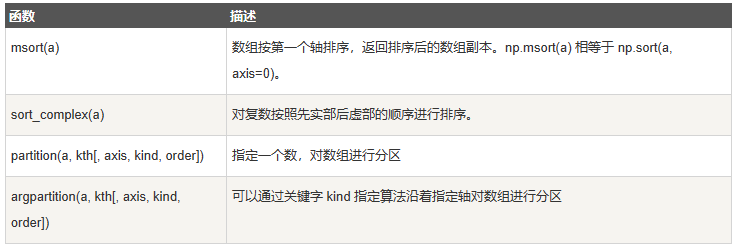

复数排序：根据复数的实部进行排序，如果两个元组的第一个元素相同，则比较它们的第二个元素（即虚部）。

In [7]:
print(np.sort_complex([5, 3, 6, 2, 1]))
print(np.sort_complex([1 + 2j, 2 - 1j, 3 - 2j, 3 - 3j, 3 + 5j]))

[1.+0.j 2.+0.j 3.+0.j 5.+0.j 6.+0.j]
[1.+2.j 2.-1.j 3.-3.j 3.-2.j 3.+5.j]


partition() 分区排序：

In [10]:
a = np.array([4, 5, 2, 1])
# 分割点参数 kth 表示分割点在排序后数组中的下标位置，而不是分割点的值。
# 将数组 a 中所有元素（包括重复元素）从小到大排列，3 表示的是排序数组索引为 3 的数字，
# 比该数字小的排在该数字前面，比该数字大的排在该数字的后面
print(np.partition(a, 3))
print(np.partition(a, (1, 3)))

[2 1 4 5]
[1 2 4 5]


找到数组的第 3 小（index=2）的值和第 2 大（index=-2）的值

In [14]:
arr = np.array([46, 57, 23, 39, 1, 10, 0, 120])
print(np.argpartition(arr, 2))
print(np.argpartition(arr, -2))
print(np.argpartition(arr, 2)[2])
print(np.argpartition(arr, -2)[-2])
print(arr[np.argpartition(arr, 2)[2]])
print(arr[np.argpartition(arr, -2)[-2]])

[6 4 5 3 1 2 0 7]
[5 3 2 6 4 0 1 7]
5
1
10
57


同时找到第 3 和第 4 小的值。注意这里，用 [2,3] 同时将第 3 和第 4 小的排序好，然后可以分别通过下标 [2] 和 [3] 取得。

In [15]:
print(arr[np.argpartition(arr, [2,3])[2]])
print(arr[np.argpartition(arr, [2,3])[3]])

10
23


numpy.argmax() 和 numpy.argmin()
numpy.argmax() 和 numpy.argmin()函数分别沿给定轴返回最大和最小元素的索引。

In [16]:
a = np.array([[30,40,70],[80,20,10],[50,90,60]])  
print  ('我们的数组是：') 
print (a) 
print ('\n') 
print ('调用 argmax() 函数：') 
print (np.argmax(a)) 
print ('\n') 
print ('展开数组：') 
print (a.flatten()) 
print ('\n') 
print ('沿轴 0 的最大值索引：') 
maxindex = np.argmax(a, axis =  0)  
print (maxindex) 
print ('\n') 
print ('沿轴 1 的最大值索引：') 
maxindex = np.argmax(a, axis =  1)  
print (maxindex) 
print ('\n') 
print ('调用 argmin() 函数：') 
minindex = np.argmin(a)  
print (minindex) 
print ('\n') 
print ('展开数组中的最小值：') 
print (a.flatten()[minindex]) 
print ('\n') 
print ('沿轴 0 的最小值索引：') 
minindex = np.argmin(a, axis =  0)  
print (minindex) 
print ('\n') 
print ('沿轴 1 的最小值索引：') 
minindex = np.argmin(a, axis =  1)  
print (minindex)

我们的数组是：
[[30 40 70]
 [80 20 10]
 [50 90 60]]


调用 argmax() 函数：
7


展开数组：
[30 40 70 80 20 10 50 90 60]


沿轴 0 的最大值索引：
[1 2 0]


沿轴 1 的最大值索引：
[2 0 1]


调用 argmin() 函数：
5


展开数组中的最小值：
10


沿轴 0 的最小值索引：
[0 1 1]


沿轴 1 的最小值索引：
[0 2 0]


numpy.nonzero()
numpy.nonzero() 函数返回输入数组中非零元素的索引。

In [17]:
a = np.array([[30,40,0],[0,20,10],[50,0,60]])  
print ('我们的数组是：')
print (a)
print ('\n')
print ('调用 nonzero() 函数：')
print (np.nonzero (a))

我们的数组是：
[[30 40  0]
 [ 0 20 10]
 [50  0 60]]


调用 nonzero() 函数：
(array([0, 0, 1, 1, 2, 2], dtype=int64), array([0, 1, 1, 2, 0, 2], dtype=int64))


numpy.extract()
numpy.extract() 函数根据某个条件从数组中抽取元素，返回满条件的元素。

In [18]:
x = np.arange(9.).reshape(3,  3)  
print ('我们的数组是：')
print (x)
# 定义条件, 选择偶数元素
condition = np.mod(x,2)  ==  0  
print ('按元素的条件值：')
print (condition)
print ('使用条件提取元素：')
print (np.extract(condition, x))

我们的数组是：
[[0. 1. 2.]
 [3. 4. 5.]
 [6. 7. 8.]]
按元素的条件值：
[[ True False  True]
 [False  True False]
 [ True False  True]]
使用条件提取元素：
[0. 2. 4. 6. 8.]


关于 lexsort 函数，简单实现了上面成绩的例子：

In [19]:
# 录入了四位同学的成绩，按照总分排序，总分相同时语文高的优先
math    = (10, 20, 50, 10)
chinese = (30, 50, 40, 60)
total   = (40, 70, 90, 70)
# 将优先级高的项放在后面
ind = np.lexsort((math, chinese, total))

for i in ind:
    print(total[i],chinese[i],math[i])

40 30 10
70 50 20
70 60 10
90 40 50
